In [34]:
# For deep learning models
!pip install tensorflow

In [35]:
import pandas as pd
import torch
import tensorflow as tf
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [36]:
import tensorflow as tf

# List physical devices
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("✅ GPU is available!")
    for gpu in gpus:
        print("→", gpu)
else:
    print("❌ No GPU found. Check runtime settings.")
    print("❌ No TPU found. Check runtime settings.")

✅ GPU is available!
→ PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [37]:
import zipfile

with zipfile.ZipFile("dataset_small.zip", "r") as zip_ref:
    zip_ref.extractall("data_folder2")

In [38]:
# import os
# print(os.listdir("data_folder"))

In [39]:
# !pip install xlrd

In [40]:
import pandas as pd

df = pd.read_csv("data_folder2/structured_cleaned_new_dataset.csv")
df.head()

,id,file_path,file_size,line_count,extension,language,code,clean_code,clean_line_count,clean_size
0,1,Markdown/000001.md,34784,572,md,Markdown,# Contributing\n\n| Component | Bui...,contributing\n\n component build ...,186,10000
1,2,XML/000002.props,3013,44,props,XML,"﻿<Project ToolsVersion=""15.0"" xmlns=""http://sc...",project toolsversion xmlns\n propertygroup\n ...,44,1812
2,3,Text/000003.txt,1076,21,txt,Text,The MIT License (MIT)\n\nCopyright (c) 2015 Mi...,the mit license mit\n\ncopyright c 2015 micros...,21,1026
3,4,Markdown/000004.md,8105,84,md,Markdown,# Azure SDK for .NET\n\n[![Packages](https://i...,azure sdk for net\n\npackageshttpsimgshieldsi...,84,7244
4,5,Markdown/000005.md,2763,41,md,Markdown,<!-- BEGIN MICROSOFT SECURITY.MD V0.0.5 BLOCK ...,begin microsoft securitymd v005 block \n\n se...,41,2523


In [41]:
missing = df["clean_code"].isnull().sum()
print(f"Missing code rows: {missing}")

Missing code rows: 58


In [42]:
df.dropna()

,id,file_path,file_size,line_count,extension,language,code,clean_code,clean_line_count,clean_size
0,1,Markdown/000001.md,34784,572,md,Markdown,# Contributing\n\n| Component | Bui...,contributing\n\n component build ...,186,10000
1,2,XML/000002.props,3013,44,props,XML,"﻿<Project ToolsVersion=""15.0"" xmlns=""http://sc...",project toolsversion xmlns\n propertygroup\n ...,44,1812
2,3,Text/000003.txt,1076,21,txt,Text,The MIT License (MIT)\n\nCopyright (c) 2015 Mi...,the mit license mit\n\ncopyright c 2015 micros...,21,1026
3,4,Markdown/000004.md,8105,84,md,Markdown,# Azure SDK for .NET\n\n[![Packages](https://i...,azure sdk for net\n\npackageshttpsimgshieldsi...,84,7244
4,5,Markdown/000005.md,2763,41,md,Markdown,<!-- BEGIN MICROSOFT SECURITY.MD V0.0.5 BLOCK ...,begin microsoft securitymd v005 block \n\n se...,41,2523
...,...,...,...,...,...,...,...,...,...,...
86222,86229,SQL/086229.sql,333,18,sql,SQL,CREATE SCHEMA TestSchema;\nGO\n\nCREATE TABLE ...,create schema testschema\ngo\n\ncreate table t...,18,253
86223,86230,SQL/086230.sql,420,8,sql,SQL,"WITH a AS (SELECT * FROM (VALUES(1),(2),(3),(4...",with a as select from values12345678910 as aa...,8,304
86224,86231,SQL/086231.sql,333,18,sql,SQL,CREATE SCHEMA TestSchema;\nGO\n\nCREATE TABLE ...,create schema testschema\ngo\n\ncreate table t...,18,253
86225,86232,SQL/086232.sql,420,8,sql,SQL,"WITH a AS (SELECT * FROM (VALUES(1),(2),(3),(4...",with a as select from values12345678910 as aa...,8,304


In [43]:
min_count = 10  # threshold
counts = df["language"].value_counts()

df["language"] = df["language"].apply(
    lambda x: x if counts[x] >= min_count else "Other"
)

print(df["language"].value_counts())

language
Dart          15345
Rust          14128
C#            10000
Go             9124
JSON           5570
              ...  
Puppet           12
RDoc             11
SourcePawn       11
Pascal           11
Gradle           10
Name: count, Length: 61, dtype: int64


In [44]:
print(df.isnull().sum())

# Check how many rows in total have any missing value
print("Rows with missing values:", df.isnull().any(axis=1).sum())

id                   0
file_path            0
file_size            0
line_count           0
extension            0
language             0
code                56
clean_code          58
clean_line_count     0
clean_size           0
dtype: int64
Rows with missing values: 58


In [45]:
df.dropna(inplace=True)

In [46]:
print("Rows with missing values:", df.isnull().any(axis=1).sum())

Rows with missing values: 0


# starting to implment the BILSTM model

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["language_encoded"] = label_encoder.fit_transform(df["language"])
num_classes = len(label_encoder.classes_)

In [48]:
from sklearn.model_selection import train_test_split

# Features (X) and labels (y)
X = df["clean_code"].values   # normalized code for ML models
y = df["language_encoded"].values    # target labels encoded

# Step 1: Split into Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,          # 30% goes to temp
    random_state=42,         # ensures reproducibility
    stratify=y               # keeps class proportions balanced
)

# Step 2: Split Temp into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,          # half of 30% = 15%
    random_state=42,
    stratify=y_temp
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

Train size: 60318
Validation size: 12925
Test size: 12926


In [49]:
from pickle import FALSE


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Clean and normalize text
def clean_text_list(text_list):
    return [str(x).lower().strip() if isinstance(x, str) else "" for x in text_list]

X_train_clean = clean_text_list(X_train)
X_val_clean   = clean_text_list(X_val)
X_test_clean  = clean_text_list(X_test)

# Step 2: Initialize tokenizer (character-level)
tokenizer = Tokenizer(char_level= False)
tokenizer.fit_on_texts(X_train_clean)  # Build vocabulary from training data

# Step 3: Define max sequence length
max_len = 1000  # You can also use np.percentile([len(x) for x in X_train_clean], 95)

# Step 4: Convert text to sequences and pad them
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_clean), maxlen=max_len)
X_val_seq   = pad_sequences(tokenizer.texts_to_sequences(X_val_clean), maxlen=max_len)
X_test_seq  = pad_sequences(tokenizer.texts_to_sequences(X_test_clean), maxlen=max_len)

# intaializaing the model
You’ll define a model that:
- Takes padded character sequences as input
- Embeds them into dense vectors
- Passes them through a Bidirectional LSTM
- Optionally applies an attention mechanism
- Outputs class predictions


In [50]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Hyperparameters
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding
embedding_dim = 128
max_len = 500  # adjust based on your sequence length
num_classes = len(np.unique(y_train))  # total number of language classes

# Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),  # input_length removed (deprecated)
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.build(input_shape=(None, max_len))


# Summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 500, 128)       │   115,430,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 500, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 500, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 61)             │         3,965 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,783,741 (441.68 MB)

 Trainable params: 115,783,741 (441.68 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.build(input_shape=(None, max_len))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 500, 128)       │   115,430,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 500, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 500, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 61)             │         3,965 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,783,741 (441.68 MB)

 Trainable params: 115,783,741 (441.68 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))


# here we de use this class weight to make sure your BiLSTM doesn’t just favor the dominant class.

In [53]:
print(type(y_train[0]))
print(np.unique(y_train))

<class 'numpy.int64'>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60]


In [54]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

history = model.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=15,
    batch_size=64,
    validation_split= 0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stop,lr_scheduler],
    shuffle=True
)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 115430272 elements. This may consume a large amount of memory.
  warnings.warn(


943/943 ━━━━━━━━━━━━━━━━━━━━ 189s 197ms/step - accuracy: 0.1946 - loss: 3.8824 - val_accuracy: 0.3885 - val_loss: 2.4477 - learning_rate: 0.0010
Epoch 2/15
943/943 ━━━━━━━━━━━━━━━━━━━━ 181s 192ms/step - accuracy: 0.4574 - loss: 2.6957 - val_accuracy: 0.5930 - val_loss: 1.6563 - learning_rate: 0.0010
Epoch 3/15
943/943 ━━━━━━━━━━━━━━━━━━━━ 202s 192ms/step - accuracy: 0.6542 - loss: 1.8478 - val_accuracy: 0.6870 - val_loss: 1.3256 - learning_rate: 0.0010
Epoch 4/15
943/943 ━━━━━━━━━━━━━━━━━━━━ 181s 192ms/step - accuracy: 0.7332 - loss: 1.4103 - val_accuracy: 0.7369 - val_loss: 1.1543 - learning_rate: 0.0010
Epoch 5/15
943/943 ━━━━━━━━━━━━━━━━━━━━ 182s 193ms/step - accuracy: 0.7912 - loss: 1.0867 - val_accuracy: 0.7387 - val_loss: 1.1488 - learning_rate: 0.0010
Epoch 6/15
943/943 ━━━━━━━━━━━━━━━━━━━━ 182s 193ms/step - accuracy: 0.8136 - loss: 0.7519 - val_accuracy: 0.8029 - val_loss: 0.9297 - learning_rate: 0.0010
Epoch 7/15
943/943 ━━━━━━━━━━━━━━━━━━━━ 181s 192ms/step - accuracy: 0.8635 

In [55]:
loss, acc = model.evaluate(X_test_seq, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

404/404 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.8881 - loss: 0.6591
Test Loss: 0.6584
Test Accuracy: 0.8877


In [56]:
y_pred_probs = model.predict(X_test_seq)
y_pred = np.argmax(y_pred_probs, axis=1)

404/404 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step


404/404 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step


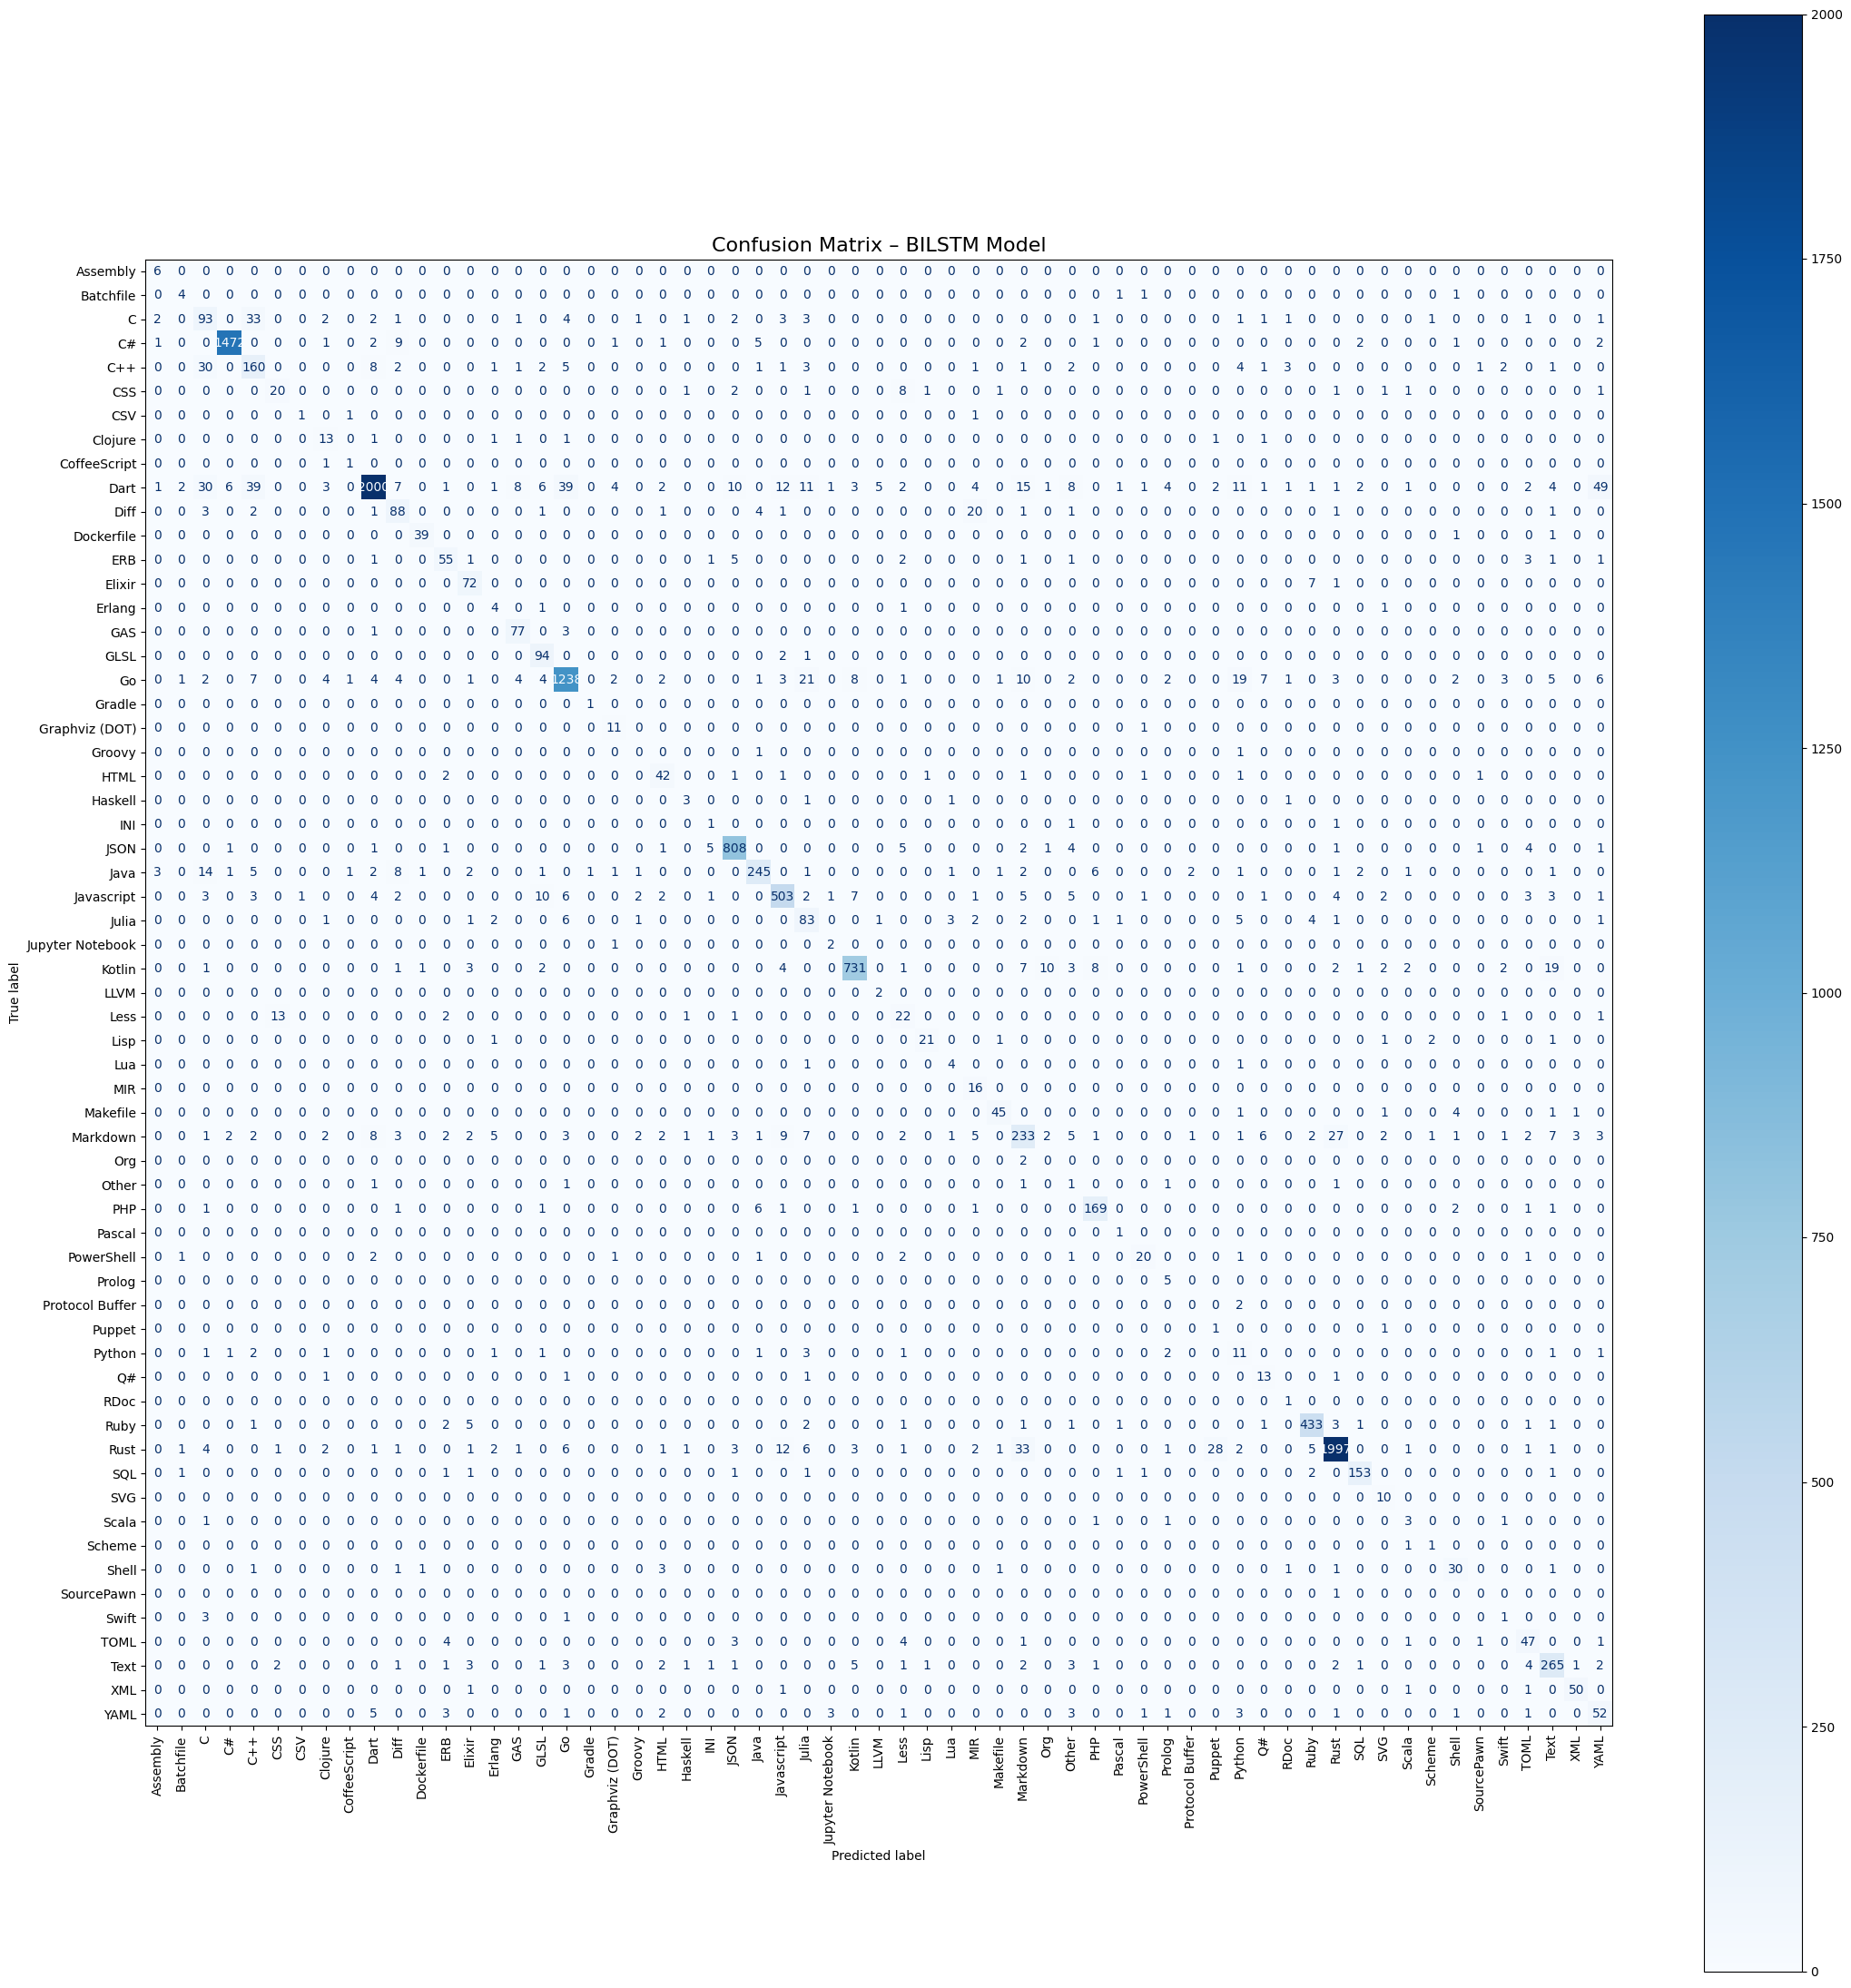

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
y_pred_probs = model.predict(X_test_seq)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = label_encoder.classes_

# Create figure and axes manually
fig, ax = plt.subplots(figsize=(22, 22))  # Try 24x24 if needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, xticks_rotation=90, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix – BILSTM Model", fontsize=16)
plt.tight_layout()
plt.show()

In [58]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 2: Evaluate using sklearn metrics
bilstm_scores = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro'),
    'f1': f1_score(y_test, y_pred, average='macro'),
    'report': classification_report(y_test, y_pred)
}

# Step 3: Print results
for metric, value in bilstm_scores.items():
    print(f"{metric}:\n{value}\n")

accuracy:
0.8876682655113725

precision:
0.5309050927729007

recall:
0.702069481225648

f1:
0.5749182170628395

report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63         6
           1       0.40      0.57      0.47         7
           2       0.50      0.60      0.54       155
           3       0.99      0.98      0.99      1500
           4       0.63      0.70      0.66       230
           5       0.56      0.53      0.54        38
           6       0.50      0.33      0.40         3
           7       0.42      0.68      0.52        19
           8       0.25      0.50      0.33         2
           9       0.98      0.87      0.92      2302
          10       0.68      0.70      0.69       125
          11       0.93      0.95      0.94        41
          12       0.74      0.76      0.75        72
          13       0.77      0.90      0.83        80
          14       0.22      0.57      0.32         7
          15   